# Challenge Development

## 1. Import Images

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [106]:
im = imread('../data/easy/brick/brick_1.jpg')

In [107]:
im.shape

(256, 256, 3)

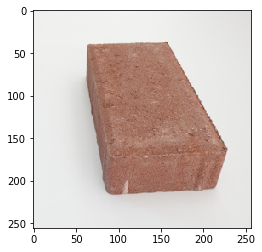

In [108]:
imshow(im)

In [109]:
def convert_to_grayscale(im):
    '''
    Convert color image to grayscale.
    Args: im = (nxmx3) floating point color image scaled between 0 and 1
    Returns: (nxm) floating point grayscale image scaled between 0 and 1
    '''
    gray = np.mean(im, axis = 2)
    return gray


In [110]:
np.mean(im, axis = 2).shape

(256, 256)

In [111]:
# plot(np.mean(im, axis = 2))

In [112]:
im_scaled = im/255
gray = convert_to_grayscale(im_scaled)

In [113]:
im_scaled.dtype

dtype('float64')

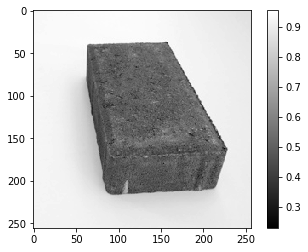

In [114]:
imshow(gray, cmap = 'gray')
colorbar()

---

## 2. Find Edges

In [115]:
def filter_2d(im, kernel):
    '''
    Filter an image by taking the dot product of each 
    image neighborhood with the kernel matrix.
    Args:
    im = (H x W) grayscale floating point image
    kernel = (M x N) matrix, smaller than im
    Returns: 
    (H-M+1 x W-N+1) filtered image.
    '''
    M = kernel.shape[0] 
    N = kernel.shape[1]
    H = im.shape[0]
    W = im.shape[1]
    
    filtered_image = np.zeros((H-M+1, W-N+1), dtype = 'float64')
    
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            image_patch = im[i:i+M, j:j+N]
            filtered_image[i, j] = np.sum(np.multiply(image_patch, kernel))
            
    return filtered_image

In [116]:
#Implement Sobel kernels as numpy arrays
Kx = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

Ky = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

In [117]:
Gx = filter_2d(gray, Kx)
Gy = filter_2d(gray, Ky)

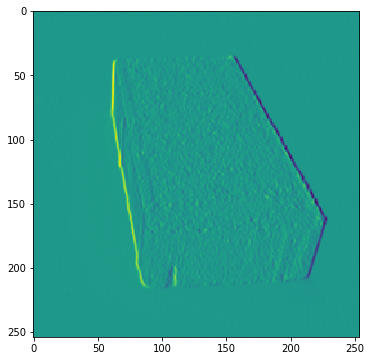

In [118]:
fig = figure(0, (6,6))
imshow(Gx)

Find magnitude and direction.

In [119]:
G = np.sqrt(Gx**2 + Gy**2)

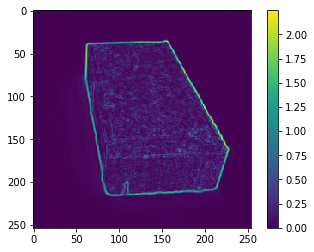

In [120]:
imshow(G)
colorbar()

In [121]:
angles = np.arctan2(Gy, Gx)

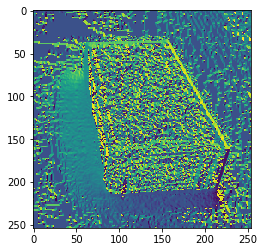

In [122]:
imshow(angles)

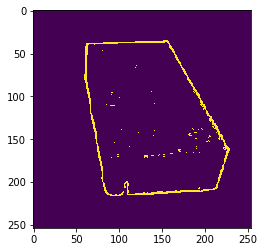

In [125]:
imshow(G>0.55)

In [126]:
angles.shape

(254, 254)

In [127]:
edge_angle_values = angles[G > 0.5]

In [128]:
edge_angle_values.shape

(1759,)

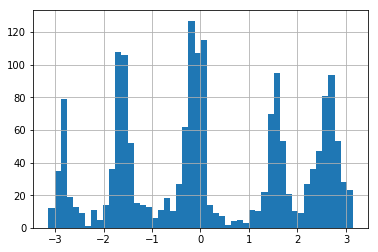

In [129]:
hist(edge_angle_values, bins = 50);
grid()

In [54]:
import glob

In [61]:
filenames = glob.glob('../data/easy/brick/*.jpg')

In [64]:
filenames

['../data/easy/brick/brick_5.jpg',
 '../data/easy/brick/brick_4.jpg',
 '../data/easy/brick/brick_6.jpg',
 '../data/easy/brick/brick_7.jpg',
 '../data/easy/brick/brick_3.jpg',
 '../data/easy/brick/brick_2.jpg',
 '../data/easy/brick/brick_1.jpg',
 '../data/easy/brick/brick_9.jpg',
 '../data/easy/brick/brick_8.jpg']

In [66]:
images = []

for filename in filenames:
    im = imread(filename)
    images.append(im)

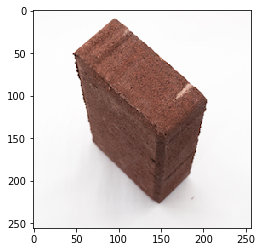

In [72]:
imshow(images[1])

In [80]:
test = np.random.randn(3,3)

In [81]:
test

array([[ 1.20937153,  1.50761821,  0.56486959],
       [ 2.30984664,  0.4549197 , -0.05260529],
       [ 1.46287815, -1.28210349,  2.42651724]])

In [95]:
fancy_index = np.array([[0, 1, 0], 
                        [0, 0, 1], 
                        [1, 0, 0]], dtype = 'bool')

In [96]:
fancy_index.shape

(3, 3)

In [97]:
test[fancy_index]

array([ 1.50761821, -0.05260529,  1.46287815])